<a href="https://colab.research.google.com/github/imaleaf03/bigdata-real_estate-model/blob/main/vietnam_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('propertyType.csv')

# Hiển thị thông tin cơ bản
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330 entries, 0 to 5329
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_link     5330 non-null   object 
 1   title             5330 non-null   object 
 2   price             5317 non-null   float64
 3   area              5330 non-null   float64
 4   price_per_m2      5318 non-null   float64
 5   bedrooms          2588 non-null   float64
 6   agent_name        3815 non-null   object 
 7   description       5304 non-null   object 
 8   address           5319 non-null   object 
 9   project           1608 non-null   object 
 10  listingDate       5319 non-null   object 
 11  expiryDate        5319 non-null   object 
 12  posting_id        5319 non-null   float64
 13  bathrooms         2485 non-null   float64
 14  balcony           990 non-null    object 
 15  entry             3521 non-null   float64
 16  images            5320 non-null   object 


In [ ]:
# Fill missing 'price' values where 'area' and 'price_per_m2' are available
df.loc[df['price'].isnull() & df['area'].notnull() & df['price_per_m2'].notnull(), 'price'] = df['area'] * df['price_per_m2']

In [ ]:
# Fill missing values with 0 for specific columns where propertyType is 'land'
df.loc[df['propertyType'] == 'land', ['bedrooms', 'bathrooms', 'numberOfFloors']] = df.loc[df['propertyType'] == 'land', ['bedrooms', 'bathrooms', 'numberOfFloors']].fillna(0)

# Fill missing values in 'furnishing' column with 'unfurnished' only for rows where propertyType is 'land'
df.loc[df['propertyType'] == 'land', 'furnishing'] = df.loc[df['propertyType'] == 'land', 'furnishing'].fillna('unfurnished')

In [ ]:
# Define the property types to include
property_types_to_impute = ['land', 'project']

# Fill missing values with 0 for specific columns where propertyType is 'land' or 'project'
df.loc[df['propertyType'].isin(property_types_to_impute), ['bedrooms', 'bathrooms', 'numberOfFloors']] = df.loc[df['propertyType'].isin(property_types_to_impute), ['bedrooms', 'bathrooms', 'numberOfFloors']].fillna(0)

# Fill missing values in 'furnishing' column with 'unfurnished' only for rows where propertyType is 'land' or 'project'
df.loc[df['propertyType'].isin(property_types_to_impute), 'furnishing'] = df.loc[df['propertyType'].isin(property_types_to_impute), 'furnishing'].fillna('unfurnished')

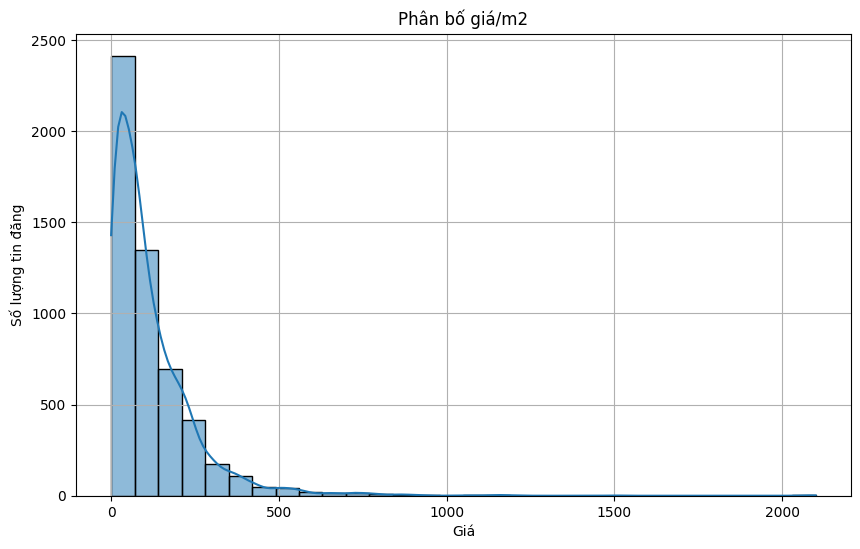

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price_per_m2'], bins=30, kde=True)
plt.title('Phân bố giá/m2')
plt.xlabel('Giá')
plt.ylabel('Số lượng tin đăng')
plt.grid(True)
plt.show()


In [ ]:
df = df[df['price_per_m2'] < 600]
print(len(df))

5259


In [ ]:
demo = df[df['price_per_m2'] < 1]
print(len(demo))
demo

52


,property_link,title,price,area,price_per_m2,bedrooms,agent_name,description,address,project,...,images,latitude,longitude,legalStatus,furnishing,houseOrientation,frontage,numberOfFloors,listingType,propertyType
56,https://batdongsan.com.vn/ban-dat-xa-thien-ngh...,Cần bán gấp đất đẹp xã Thiện Nghiệp view biển:...,8.000000e+09,17637.0,0.45359,0.0,‎Nguyễn văn nhơn,Cần bán gấp đất đẹp xã Thiện Nghiệp view biển ...,"Xã Thiện Nghiệp, Phan Thiết, Bình Thuận",NaN,...,['https://file4.batdongsan.com.vn/resize/1275x...,10.978617,108.252880,red-book,unfurnished,NaN,191.36,0.0,standard,land
96,https://batdongsan.com.vn/ban-dat-xa-long-my/b...,Bán 3314m2 đất vườn dừa có 300m2 thổ cư tặng n...,1.100000e+09,3314.0,0.33192,0.0,NaN,Bán 3 công đất tặng ngôi nhà.Đất vườn dừa 3314...,"Xã Long Mỹ, Giồng Trôm, Bến Tre",NaN,...,['https://file4.batdongsan.com.vn/resize/1275x...,10.154636,106.455667,red-book,unfurnished,NaN,32.00,0.0,standard,land
124,https://batdongsan.com.vn/ban-dat-duong-55-xa-...,"Chủ cần bán 8.2 sào 2 MT Sơn Mỹ, Hàm Tân, Bình...",2.500000e+09,8297.0,0.30131,0.0,NaN,- Lô Sơn Mỹ kế đường Tân Minh - Sơn Mỹ đang kh...,"Đường 55, Xã Sơn Mỹ, Hàm Tân, Bình Thuận",NaN,...,['https://file4.batdongsan.com.vn/resize/1275x...,10.655008,107.683064,red-book,unfurnished,NaN,180.00,0.0,standard,land
160,https://batdongsan.com.vn/ban-dat-duong-huong-...,Chỉ 390triệu/395m2 mặt tiền HL2 30m nhựa - Sổ ...,3.900000e+08,395.0,0.98734,0.0,‎Huỳnh Minh Kiên,Chính chủ ký gửi bán lô đất mặt tiền đường HL2...,"Đường Hương lộ 2, Xã An Tịnh, Trảng Bàng, Tây ...",NaN,...,['https://file4.batdongsan.com.vn/resize/1275x...,11.066383,106.417301,red-book,unfurnished,NaN,8.20,0.0,standard,land
192,https://batdongsan.com.vn/ban-dat-duong-20-5-p...,"Cần bán gấp đất 2.000m2 P11 Đà Lạt view hồ, să...",1.900000e+08,2000.0,0.09500,0.0,NaN,"Chính chủ cần bán gấp!Vị trí phường 11, đường ...","Đường 20, Phường 11, Đà Lạt, Lâm Đồng",NaN,...,['https://file4.batdongsan.com.vn/resize/1275x...,11.945144,108.488019,red-book,unfurnished,NaN,40.00,0.0,standard,land
203,https://batdongsan.com.vn/ban-dat-xa-xuan-dong...,"Cần tiền đáo hạn, bán đất chính chủ, diện tích...",6.500000e+08,1115.0,0.58296,0.0,NaN,"Cần tiền đáo hạn ngân hàng.Bán đất chính chủ, ...","Xã Xuân Đồng, Diên Khánh, Khánh Hòa",NaN,...,['https://file4.batdongsan.com.vn/resize/1275x...,12.327541,108.958433,red-book,unfurnished,NaN,20.00,0.0,standard,land
240,https://batdongsan.com.vn/ban-dat-xa-ngoc-dinh...,"Chính chủ cần bán 1465m2 mặt tiền bê tông, các...",1.450000e+09,1465.0,0.98976,0.0,‎Hoàng Ngọc Lâm,"Bán đất cách Quốc Lộ 20 chỉ 300m, gần khu công...","Xã Ngọc Định, Định Quán, Đồng Nai",NaN,...,['https://file4.batdongsan.com.vn/resize/1275x...,11.213805,107.314649,red-book,unfurnished,NaN,NaN,0.0,standard,land
402,https://batdongsan.com.vn/ban-dat-xa-binh-than...,"Em cần bán lại lô đất tại ấp 4 xã Bình Thành, ...",4.800000e+08,1414.0,0.33946,0.0,NaN,"Hiện tại em cần bán lại lô đất tại Ấp 4, Bình ...","Xã Bình Thành, Đức Huệ, Long An",NaN,...,['https://file4.batdongsan.com.vn/resize/1275x...,10.808767,106.254684,red-book,unfurnished,NaN,NaN,0.0,standard,land
492,https://batdongsan.com.vn/ban-dat-xa-van-thanh...,Mở bán duy nhất mặt biển Vân Phong giáp khu th...,4.540000e+09,11368.0,0.39900,0.0,‎Đỗ Hữu Ngọc Minh,Duy nhất trong T8/25 mở bán 01 lô mặt biển Bắc...,"Thôn Đầm Môn, Xã Vạn Thạnh, Vạn Ninh, Khánh Hòa",NaN,...,['https://i1.ytimg.com/vi/82cmyNuH25U/maxresde...,12.660563,109.348298,red-book,unfurnished,east,100.00,0.0,standard,land
498,https://batdongsan.com.vn/ban-dat-xa-van-thanh...,Tin được không! Mặt biển du lịch Bắc Vân Phong...,4.540000e+09,11368.0,0.39900,0.0,‎Đỗ Hữu Ngọc Minh,Thuộc khu đô thị cao cấp & Bến Du Thuyền Vĩnh ...,"Xã Vạn Thạnh, Vạn Ninh, Khánh Hòa",NaN,...,['https://i1.ytimg.com/vi/82cmyNuH25U/maxresde...,12.626328,109.386973,red-book,unfurnished,southeast,100.00,0.0,standard,land


In [ ]:
import re

def remove_project_from_address(row):
    addr = str(row["address"])
    proj = str(row["project"]).strip()

    if proj and proj != "nan":
        if addr.startswith(proj):  # Nếu address bắt đầu bằng project
            addr = re.sub(rf"^{re.escape(proj)}\s*,\s*", "", addr)
    return addr

def clean_and_split(row):
    addr = str(row["address"])
    proj = str(row["project"]).strip()

    # Nếu address bắt đầu bằng project thì bỏ
    if proj and proj != "nan" and addr.startswith(proj):
        addr = re.sub(rf"^{re.escape(proj)}\s*,\s*", "", addr)

    parts = [p.strip() for p in addr.split(",") if p.strip()]

    result = {
        "house_number": np.nan,
        "street": np.nan,
        "ward": np.nan,
        "district": np.nan,
        "province": np.nan
    }

    if not parts:
        return pd.Series(result)

    # province = phần cuối
    result["province"] = parts[-1]

    # district = phần kế cuối (nếu có)
    if len(parts) >= 2:
        result["district"] = parts[-2]

    # street
    for p in parts:
        if p.startswith(("Đường", "Phố", "Hẻm")) or re.match(r"^\d+", p):
            result["street"] = p
            break

    # ward/commune
    for p in parts:
        if p.startswith(("Phường", "Xã", "Thị trấn")):
            result["ward"] = p
            break

    # house_number
    if re.match(r"^\d+", parts[0]):
        result["house_number"] = parts[0]

    return pd.Series(result)

df = df.join(df.apply(clean_and_split, axis=1))
df

,property_link,title,price,area,price_per_m2,bedrooms,agent_name,description,address,project,...,houseOrientation,frontage,numberOfFloors,listingType,propertyType,house_number,street,ward,district,province
0,https://batdongsan.com.vn/ban-dat-duong-nguyen...,"CC bán lô đất 2.617m2 mặt tiền Nguyễn Văn Bứa,...",3.402000e+10,2617.0,13.00,0.0,‎Nguyễn Trường Hoàng,"DT: 2.617m². 200m² TC.Vị trí cực đẹp, mặt tiền...","Đường Nguyễn Văn Bứa, Xã Xuân Thới Sơn, Hóc Mô...",NaN,...,NaN,NaN,0.0,feature,land,NaN,Đường Nguyễn Văn Bứa,Xã Xuân Thới Sơn,Hóc Môn,Hồ Chí Minh
1,https://batdongsan.com.vn/ban-dat-duong-dong-l...,Bán lô đất biệt thự 600m2 full thổ cư sau sân ...,2.280000e+10,600.0,38.00,0.0,‎Hằng Nguyễn,Chính chủ cần bán lô đất biệt thự cạnh sân bay...,"Đường Đồng Lai, Xã Quang Tiến, Sóc Sơn, Hà Nội",NaN,...,NaN,19.0,0.0,feature,land,NaN,Đường Đồng Lai,Xã Quang Tiến,Sóc Sơn,Hà Nội
2,https://batdongsan.com.vn/ban-dat-duong-song-h...,Bán đất trung tâm TP Cần Thơ 3 mặt tiền - sổ sẵn,4.000000e+11,4881.0,81.95,0.0,‎Tiên Tiên,Bán lô đất vàng trung tâm TP. Cần Thơ 3 mặt ti...,"Đường Sông Hậu, Phường Cái Khế, Ninh Kiều, Cần...",NaN,...,southeast,120.0,0.0,feature,land,NaN,Đường Sông Hậu,Phường Cái Khế,Ninh Kiều,Cần Thơ
3,https://batdongsan.com.vn/ban-dat-xa-giao-phon...,"Chính chủ bán đất Giao Thủy, Nam Định - đất vu...",2.050000e+09,83.5,24.55,0.0,‎Thăng Đặng Danh,"Hàng nét, đất Giao Phong, Quất Lâm gần 84m² MT...","Xã Giao Phong, Giao Thủy, Nam Định",NaN,...,NaN,4.6,0.0,premium,land,NaN,NaN,Xã Giao Phong,Giao Thủy,Nam Định
4,https://batdongsan.com.vn/ban-dat-duong-nguyen...,Chính chủ bán đất bán đất ngay trung tâm huyện...,7.000000e+09,232.1,30.16,0.0,‎Hoàng,Chính chủ bán đất bán đất ngay trung tâm huyện...,"Đường Nguyễn Kim Quy, Xã Phú Hội, Nhơn Trạch, ...",NaN,...,NaN,10.0,0.0,premium,land,NaN,Đường Nguyễn Kim Quy,Xã Phú Hội,Nhơn Trạch,Đồng Nai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5325,https://batdongsan.com.vn/ban-shophouse-nha-ph...,Nhà phố Eco City phân khu Milano,5.500000e+09,120.0,45.83,5.0,NaN,"Nhà phố Eco City Premia.Mặt tiền 6m rộng rãi, ...","Dự án Eco City Premia, Phường Tân An, Buôn Ma ...",EcoCity Premia,...,northwest,6.0,4.0,standard,khác,NaN,NaN,Phường Tân An,Buôn Ma Thuột,Đắk Lắk
5326,https://batdongsan.com.vn/ban-shophouse-nha-ph...,Tôi cần bán căn shophouse 75m2 mặt công viên t...,2.400000e+10,75.0,320.00,5.0,NaN,Tôi cần bán căn shophouse 75m² mặt công viên t...,"Dự án The Manor Central Park, Đường Nguyễn Xiể...",The Manor Central Park,...,southeast,5.0,5.0,standard,khác,NaN,Đường Nguyễn Xiển,Phường Đại Kim,Hoàng Mai,Hà Nội
5327,https://batdongsan.com.vn/ban-shophouse-nha-ph...,Chủ ngộp giảm ngay 450tr còn 2.05 tỷ căn shoph...,2.050000e+09,100.0,20.50,3.0,‎Lê Duy Quang,Chủ ngộp bank giảm ngay 450Tr còn 2.05 tỷ căn ...,"Thăng Long Central City, Đường DX 614, Thị trấ...",Thăng Long Central City,...,NaN,5.0,3.0,standard,khác,NaN,Đường DX 614,Thị trấn Lai Uyên,Bàu Bàng,Bình Dương
5328,https://batdongsan.com.vn/ban-shophouse-nha-ph...,Chính chủ cần bán gấp shophouse Eco Charm Đà N...,5.100000e+09,105.0,48.57,NaN,‎Lưu Văn Hoàng,- Cần bán căn shophouse Eco Charm tại Liên Chi...,"Dự án Gami Eco Charm, Đường Nguyễn Lương Bằng,...",Gami Eco Charm,...,east,7.0,4.0,standard,khác,NaN,Đường Nguyễn Lương Bằng,Phường Hòa Hiệp Nam,Liên Chiểu,Đà Nẵng


In [ ]:
columns_to_check = ['price', 'address', 'latitude', 'longitude',
                    'listingType', 'ward', 'legalStatus']
df.dropna(subset=columns_to_check, inplace=True)

print(f"Số lượng dòng sau khi loại bỏ giá trị thiếu: {len(df)}")

Số lượng dòng sau khi loại bỏ giá trị thiếu: 5096


In [ ]:
'''number: 'area', 'bedrooms', 'bathrooms', 'latitude', 'longitude', 'numberOfFloors', 'frontage'
category = 'legalStatus', 'furnishing', 'listingType', 'propertyType', 'ward', 'district', 'province'
'''

"number: 'area', 'bedrooms', 'bathrooms', 'latitude', 'longitude', 'numberOfFloors', 'frontage'\ncategory = 'legalStatus', 'furnishing', 'listingType', 'propertyType', 'ward', 'district', 'province'\n"

In [ ]:
missing_values_count = df.isnull().sum()
print("Số lượng giá trị bị thiếu ở mỗi cột sau khi điền một số giá trị:")
print(missing_values_count)

Số lượng giá trị bị thiếu ở mỗi cột sau khi điền một số giá trị:
property_link          0
title                  0
price                  0
area                   0
price_per_m2           0
bedrooms             453
agent_name          1463
description           12
address                0
project             3591
listingDate            0
expiryDate             0
posting_id             0
bathrooms            553
balcony             4160
entry               1705
images                 0
latitude               0
longitude              0
legalStatus            0
furnishing           957
houseOrientation    2873
frontage            1473
numberOfFloors       838
listingType            0
propertyType           0
house_number        4950
street              1086
ward                   0
district               0
province               0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'price' is your target variable
X = df.drop('price', axis=1)
y = df['price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")

Kích thước tập huấn luyện: (4076, 30)
Kích thước tập kiểm tra: (1020, 30)


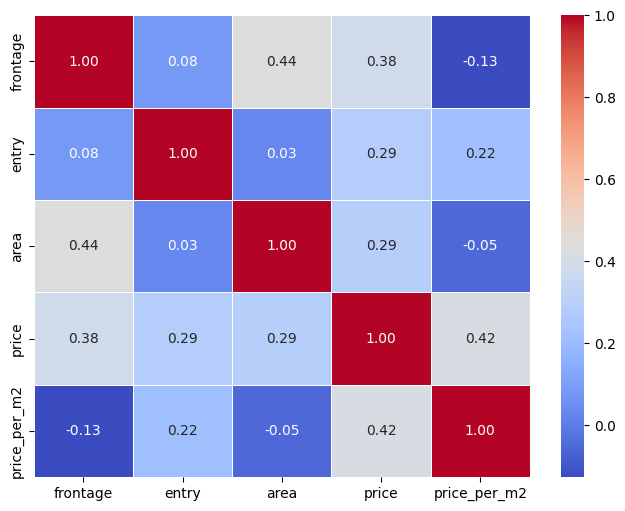

In [ ]:
# Select the relevant columns
correlation_columns = ['frontage', 'entry', 'area', 'price','price_per_m2']
correlation_df = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [ ]:
# Create area bins for grouping based on the training set distribution using qcut
# Use X_train for calculating bins and quantiles to avoid data leakage from the test set
X_train['area_bin'] = pd.qcut(X_train['area'], q=30, labels=False, duplicates='drop')

# Apply the same bins (quantiles) to the test set
# We need to get the bin edges from the qcut applied to the training data
# qcut returns labels (0 to q-1) when labels=False, so we need to apply the same logic to the test set.
# A robust way is to get the bin edges from the training set and apply them to the test set using pd.cut
train_bin_edges = X_train.groupby('area_bin')['area'].min().tolist() + [X_train['area'].max()]
train_bin_edges = sorted(list(set(train_bin_edges))) # Ensure unique and sorted edges

# Using pd.cut with the explicit bin edges derived from the training set
X_test['area_bin'] = pd.cut(X_test['area'], bins=train_bin_edges, labels=False, include_lowest=True)


# Calculate the mean 'frontage' for each area bin in the training set
imputation_frontage_by_area_bin = X_train.groupby('area_bin')['frontage'].mean()

# Impute missing 'frontage' values in the training set using the means calculated from the area bins
X_train['frontage'] = X_train.groupby('area_bin')['frontage'].transform(lambda x: x.fillna(x.mean()))

# Impute missing 'frontage' values in the testing set using the means calculated from the training set area bins
# Use .get() with a default value (like the overall mean of frontage in X_train) to handle potential area_bin values in X_test
# that were not present in X_train or where area_bin is NaN
overall_frontage_mean_train = X_train['frontage'].mean() # Calculate overall mean from train set

# Apply imputation to the test set, handling potential NaN in area_bin in test set
X_test['frontage'] = X_test.apply(lambda row: imputation_frontage_by_area_bin.get(row['area_bin'], overall_frontage_mean_train) if pd.isnull(row['frontage']) else row['frontage'], axis=1)

# Drop the temporary 'area_bin' column
X_train = X_train.drop('area_bin', axis=1)
X_test = X_test.drop('area_bin', axis=1)


# Verify that there are no more missing values in 'frontage' in the training set
print("Missing values in 'frontage' after imputation (Training Set):")
print(X_train['frontage'].isnull().sum())

# Verify that there are no more missing values in 'frontage' in the testing Set:")
print("\nMissing values in 'frontage' after imputation (Testing Set):")
print(X_test['frontage'].isnull().sum())

Missing values in 'frontage' after imputation (Training Set):
0

Missing values in 'frontage' after imputation (Testing Set):
0


In [ ]:
# Identify numerical columns to impute with median
numerical_cols_median_impute = ['numberOfFloors', 'bedrooms', 'bathrooms', 'entry']

# Calculate the median of these columns on the TRAINING set
imputation_medians = X_train[numerical_cols_median_impute].median()

# Impute missing values in both training and testing sets using the medians calculated from the training set
X_train[numerical_cols_median_impute] = X_train[numerical_cols_median_impute].fillna(imputation_medians)
X_test[numerical_cols_median_impute] = X_test[numerical_cols_median_impute].fillna(imputation_medians)

# Verify that there are no more missing values in these columns in the training set
print("Missing values in numberOfFloors, bedrooms, bathrooms, and entry after median imputation (Training Set):")
print(X_train[numerical_cols_median_impute].isnull().sum())

# Verify that there are no more missing values in these columns in the testing set
print("\nMissing values in numberOfFloors, bedrooms, bathrooms, and entry after median imputation (Testing Set):")
print(X_test[numerical_cols_median_impute].isnull().sum())

Missing values in numberOfFloors, bedrooms, bathrooms, and entry after median imputation (Training Set):
numberOfFloors    0
bedrooms          0
bathrooms         0
entry             0
dtype: int64

Missing values in numberOfFloors, bedrooms, bathrooms, and entry after median imputation (Testing Set):
numberOfFloors    0
bedrooms          0
bathrooms         0
entry             0
dtype: int64


In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder

# Apply Target Encoding for the 'ward' column using 'price_per_m2' as the target
# Instantiate TargetEncoder - specify cols as 'ward' and smoothing if desired
target_encoder = TargetEncoder(cols=['ward'])

# Fit the encoder on the TRAINING data (X_train and y_train) for 'price_per_m2' target
# We need to use 'price_per_m2' from X_train as the target for fitting the encoder
target_encoder.fit(X_train['ward'], X_train['price_per_m2'])

# Transform both training and testing data
# Transform results are DataFrames, rename columns directly
X_train_encoded_ward = target_encoder.transform(X_train['ward'])
X_test_encoded_ward = target_encoder.transform(X_test['ward'])


# Rename the encoded column for clarity
X_train_encoded_ward.columns = ['ward_encoded_price_per_m2']
X_test_encoded_ward.columns = ['ward_encoded_price_per_m2']


print("\nKích thước tập huấn luyện sau Target Encoding (ward):", X_train_encoded_ward.shape)
print("Kích thước tập kiểm tra sau Target Encoding (ward):", X_test_encoded_ward.shape)

# Display the first few rows of the Target Encoded training data
print("\nTarget Encoded Training Data (ward_encoded_price_per_m2 - first 5 rows):")
display(X_train_encoded_ward.head())

# Display the first few rows of the Target Encoded testing data
print("\nTarget Encoded Testing Data (ward_encoded_price_per_m2 - first 5 rows):")
display(X_test_encoded_ward.head())


Kích thước tập huấn luyện sau Target Encoding (ward): (4076, 1)
Kích thước tập kiểm tra sau Target Encoding (ward): (1020, 1)

Target Encoded Training Data (ward_encoded_price_per_m2 - first 5 rows):


,ward_encoded_price_per_m2
3670,106.635978
530,115.074801
3390,100.021799
4399,157.890114
5193,134.244608



Target Encoded Testing Data (ward_encoded_price_per_m2 - first 5 rows):


,ward_encoded_price_per_m2
1022,108.586801
3660,155.435954
873,94.667587
3580,122.369238
80,80.618065


In [ ]:
from category_encoders import TargetEncoder

def apply_target_encoding(X_train_df, X_test_df, column_to_encode, target_column):

    # Instantiate TargetEncoder
    target_encoder = TargetEncoder(cols=[column_to_encode])

    # Fit the encoder on the TRAINING data using the specified target column
    target_encoder.fit(X_train_df[column_to_encode], X_train_df[target_column])

    # Transform both training and testing data
    X_train_encoded = target_encoder.transform(X_train_df[column_to_encode])
    X_test_encoded = target_encoder.transform(X_test_df[column_to_encode])

    # Rename the encoded columns for clarity
    encoded_col_name = f"{column_to_encode}_encoded_{target_column}"
    X_train_encoded.columns = [encoded_col_name]
    X_test_encoded.columns = [encoded_col_name]


    return X_train_encoded, X_test_encoded

# Example usage: Apply Target Encoding to 'ward' using 'price_per_m2'
X_train_encoded_ward, X_test_encoded_ward = apply_target_encoding(X_train, X_test, 'ward', 'price_per_m2')

print("Target Encoded 'ward' column (Training Set):")
display(X_train_encoded_ward.head())
print("\nTarget Encoded 'ward' column (Testing Set):")
display(X_test_encoded_ward.head())

# Example usage: Apply Target Encoding to 'district' using 'price_per_m2'
X_train_encoded_district, X_test_encoded_district = apply_target_encoding(X_train, X_test, 'district', 'price_per_m2')

print("\nTarget Encoded 'district' column (Training Set):")
display(X_train_encoded_district.head())
print("\nTarget Encoded 'district' column (Testing Set):")
display(X_test_encoded_district.head())

Target Encoded 'ward' column (Training Set):


,ward_encoded_price_per_m2
3670,106.635978
530,115.074801
3390,100.021799
4399,157.890114
5193,134.244608



Target Encoded 'ward' column (Testing Set):


,ward_encoded_price_per_m2
1022,108.586801
3660,155.435954
873,94.667587
3580,122.369238
80,80.618065



Target Encoded 'district' column (Training Set):


,district_encoded_price_per_m2
3670,109.339649
530,158.706198
3390,91.827275
4399,167.541208
5193,229.622493



Target Encoded 'district' column (Testing Set):


,district_encoded_price_per_m2
1022,96.860961
3660,167.541208
873,84.299136
3580,170.046832
80,36.780818


## Xây dựng Pipeline cho quy trình tiền xử lý và mô hình

Chúng ta sẽ xây dựng một pipeline bao gồm các bước sau:
1. Điền giá trị thiếu cho các cột số.
2. Áp dụng Target Encoding cho cột 'ward' và 'district'.
3. Áp dụng One-Hot Encoding cho các cột phân loại còn lại.
4. Huấn luyện một mô hình hồi quy (ví dụ: Linear Regression hoặc RandomForestRegressor).

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error # Import MAPE
import numpy as np # Import numpy for square root

# Identify columns to drop before processing
columns_to_drop = ['property_link', 'title', 'agent_name', 'description', 'address',
                   'project', 'listingDate', 'expiryDate', 'posting_id', 'images',
                   'balcony', 'houseOrientation', 'house_number', 'street','price_per_m2'] # address components might not be useful after ward/district/province encoding


# Drop unnecessary columns from X_train and X_test
X_train_processed = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test_processed = X_test.drop(columns=columns_to_drop, errors='ignore')


# Identify numerical, target-encoded, and one-hot encoded columns from the *remaining* columns
numerical_features = ['area', 'latitude', 'longitude', 'numberOfFloors', 'bedrooms', 'bathrooms', 'entry', 'frontage'] # Include relevant numerical features
target_encoded_features = ['ward', 'district'] # Columns for Target Encoding
one_hot_features = ['legalStatus', 'furnishing', 'listingType', 'propertyType', 'province'] # Columns for One-Hot Encoding


# Ensure the selected features are present in the processed dataframes
numerical_features = [col for col in numerical_features if col in X_train_processed.columns]
target_encoded_features = [col for col in target_encoded_features if col in X_train_processed.columns]
one_hot_features = [col for col in one_hot_features if col in X_train_processed.columns]


# Create preprocessing steps
# Imputation for numerical features (using median as discussed)
# Use SimpleImputer with strategy='median' within the pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])


# Create ColumnTransformer for different types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('target', TargetEncoder(cols=target_encoded_features), target_encoded_features), # Target encode ward and district
        ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_features) # One-hot encode others
    ],
    remainder='drop' # Drop any columns not specified in transformers
)

# Define a dictionary of models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42) # Add Gradient Boosting
}

results = {}

for name, regressor in models.items():
    print(f"Training and evaluating {name}...")

    # Create the full pipeline with the current model
    model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', regressor)])

    # Train the pipeline
    model.fit(X_train_processed, y_train)

    # Evaluate on the test data
    score = model.score(X_test_processed, y_test)
    y_pred = model.predict(X_test_processed)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) # Calculate MAPE


    results[name] = {
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape # Store MAPE
    }

    print(f"{name} R^2 score on test set: {score}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
    print("-" * 30)

# Display results summary
print("\nModel Evaluation Summary:")
results_df = pd.DataFrame(results).T
display(results_df)

Training and evaluating Linear Regression...
Linear Regression R^2 score on test set: 0.05137997547330542
Mean Absolute Error (MAE): 11633771566.378397
Mean Squared Error (MSE): 6.266294598238394e+20
Root Mean Squared Error (RMSE): 25032567983.006447
R^2 Score: 0.05137997547330542
Mean Absolute Percentage Error (MAPE): 1.796790693329731
------------------------------
Training and evaluating Random Forest Regressor...
Random Forest Regressor R^2 score on test set: 0.474743509537641
Mean Absolute Error (MAE): 6092669881.672647
Mean Squared Error (MSE): 3.4696841978601046e+20
Root Mean Squared Error (RMSE): 18627088333.55365
R^2 Score: 0.474743509537641
Mean Absolute Percentage Error (MAPE): 0.9887816393507107
------------------------------
Training and evaluating Gradient Boosting Regressor...
Gradient Boosting Regressor R^2 score on test set: 0.5877810913324926
Mean Absolute Error (MAE): 6170457662.059509
Mean Squared Error (MSE): 2.7229924035851295e+20
Root Mean Squared Error (RMSE): 1

,R2 Score,MAE,MSE,RMSE,MAPE
Linear Regression,0.051380,1.163377e+10,6.266295e+20,2.503257e+10,1.796791
Random Forest Regressor,0.474744,6.092670e+09,3.469684e+20,1.862709e+10,0.988782
Gradient Boosting Regressor,0.587781,6.170458e+09,2.722992e+20,1.650149e+10,0.854409


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
# Import the new regressors
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Identify columns to drop entirely before starting the pipeline
columns_to_drop_before_pipeline = ['property_link', 'title', 'agent_name', 'description', 'address',
                                   'project', 'listingDate', 'expiryDate', 'posting_id', 'images',
                                   'balcony', 'houseOrientation', 'house_number', 'street', 'price_per_m2'] # Exclude price_per_m2 here

# Drop these columns from the original X_train and X_test DataFrames
X_train_cleaned = X_train.drop(columns=columns_to_drop_before_pipeline, errors='ignore')
X_test_cleaned = X_test.drop(columns=columns_to_drop_before_pipeline, errors='ignore')


# Identify numerical, target-encoded, and one-hot encoded columns from the *cleaned* data
# These are the columns that will go into the ColumnTransformer
numerical_features = ['area', 'latitude', 'longitude', 'numberOfFloors', 'bedrooms', 'bathrooms', 'entry', 'frontage']
target_encoded_features = ['ward', 'district']
one_hot_features = ['legalStatus', 'furnishing', 'listingType', 'propertyType', 'province']

# Ensure all identified features are actually present in the cleaned dataframes
numerical_features = [col for col in numerical_features if col in X_train_cleaned.columns]
target_encoded_features = [col for col in target_encoded_features if col in X_train_cleaned.columns]
one_hot_features = [col for col in one_hot_features if col in X_train_cleaned.columns]


# Create preprocessing steps within the pipeline using ColumnTransformer
# Imputation for numerical features (using median)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Target Encoding for specified columns
# TargetEncoder can be directly included in ColumnTransformer
target_encoder_transformer = TargetEncoder(cols=target_encoded_features)

# One-Hot Encoding for other categorical features
onehot_encoder_transformer = OneHotEncoder(handle_unknown='ignore')


# Create ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('target', target_encoder_transformer, target_encoded_features),
        ('onehot', onehot_encoder_transformer, one_hot_features)
    ],
    remainder='drop' # Drop any columns not explicitly listed in transformers
)

# Define a dictionary of models to test
models = {
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'LightGBM Regressor': LGBMRegressor(random_state=42),
    'CatBoost Regressor': CatBoostRegressor(random_state=42, verbose=0), # verbose=0 to suppress output
}

results = {}

for name, regressor in models.items():
    print(f"Training and evaluating {name}...")

    # Create the full pipeline with the preprocessor and the current model
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', regressor)])

    # Train the pipeline on the CLEANED training data
    model_pipeline.fit(X_train_cleaned, y_train)

    # Evaluate on the CLEANED test data
    score = model_pipeline.score(X_test_cleaned, y_test)
    y_pred = model_pipeline.predict(X_test_cleaned)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)


    results[name] = {
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

    print(f"{name} R^2 score on test set: {score}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
    print("-" * 30)

# Display results summary
print("\nModel Evaluation Summary (XGBoost, LightGBM, CatBoost - without price_per_m2):")
results_df = pd.DataFrame(results).T
display(results_df)

Training and evaluating XGBoost Regressor...
XGBoost Regressor R^2 score on test set: 0.6545298597006142
Mean Absolute Error (MAE): 5042395809.459313
Mean Squared Error (MSE): 2.2820703949305925e+20
Root Mean Squared Error (RMSE): 15106523077.566832
R^2 Score: 0.6545298597006142
Mean Absolute Percentage Error (MAPE): 0.661969911627027
------------------------------
Training and evaluating LightGBM Regressor...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1620
[LightGBM] [Info] Number of data points in the train set: 4076, number of used features: 44
[LightGBM] [Info] Start training from score 15995647685.186949


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM Regressor R^2 score on test set: 0.5870562953966507
Mean Absolute Error (MAE): 5574461584.345053
Mean Squared Error (MSE): 2.7277801845091684e+20
Root Mean Squared Error (RMSE): 16515992808.514929
R^2 Score: 0.5870562953966507
Mean Absolute Percentage Error (MAPE): 0.843071346716287
------------------------------
Training and evaluating CatBoost Regressor...
CatBoost Regressor R^2 score on test set: 0.6424248876072813
Mean Absolute Error (MAE): 5161553336.679145
Mean Squared Error (MSE): 2.3620321491410036e+20
Root Mean Squared Error (RMSE): 15368904154.626652
R^2 Score: 0.6424248876072813
Mean Absolute Percentage Error (MAPE): 0.721996716233782
------------------------------

Model Evaluation Summary (XGBoost, LightGBM, CatBoost - without price_per_m2):


,R2 Score,MAE,MSE,RMSE,MAPE
XGBoost Regressor,0.654530,5.042396e+09,2.282070e+20,1.510652e+10,0.661970
LightGBM Regressor,0.587056,5.574462e+09,2.727780e+20,1.651599e+10,0.843071
CatBoost Regressor,0.642425,5.161553e+09,2.362032e+20,1.536890e+10,0.721997


In [ ]:
!pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


In [ ]:
# Example with RandomForestRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(criterion='absolute_error',random_state=42))])
model.fit(X_train_processed, y_train)

# And evaluate on the test data
score = model.score(X_test_processed, y_test)
print(f"Model R^2 score on test set: {score}")

# Make predictions
y_pred = model.predict(X_test_processed)

# You can also evaluate using other metrics like MAE, MSE, RMSE

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
# Display some predictions vs actual
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("\nActual vs Predicted Prices (first 10):")
display(comparison_df.head(10))

Model R^2 score on test set: 0.5155727460354204
Mean Absolute Error (MAE): 6096401537.470378
Root Mean Squared Error (RMSE): 17888484319.59006
R^2 Score: 0.5155727460354204
Mean Absolute Percentage Error (MAPE): 1.0196423210151246

Actual vs Predicted Prices (first 10):


,Actual Price,Predicted Price
1022,9.500000e+08,5.435750e+09
3660,2.426000e+10,1.782250e+10
873,1.550000e+09,1.317420e+09
3580,2.380000e+10,2.094250e+10
80,2.720000e+09,2.767050e+09
2576,3.670000e+09,9.409300e+09
1790,3.200000e+10,2.674060e+10
4940,1.090000e+10,1.136300e+10
3151,3.500000e+09,3.180500e+09
2096,1.450000e+10,6.106620e+09


In [ ]:
import time
model_mse = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(criterion='squared_error', random_state=42))])

# Measure training time
start_time_mse = time.time()
model_mse.fit(X_train_processed, y_train)
end_time_mse = time.time()
training_time_mse = end_time_mse - start_time_mse
print(f"Training time (MSE): {training_time_mse:.2f} seconds")

# Evaluate
y_pred_mse = model_mse.predict(X_test_processed)
mae_mse = mean_absolute_error(y_test, y_pred_mse)
mse_mse = mean_squared_error(y_test, y_pred_mse)
rmse_mse = np.sqrt(mse_mse)
r2_mse = r2_score(y_test, y_pred_mse)
mape_mse = mean_absolute_percentage_error(y_test, y_pred_mse)

print("\nEvaluation Metrics (MSE Criterion):")
print(f"R^2 Score: {r2_mse}")
print(f"Mean Absolute Error (MAE): {mae_mse}")
print(f"Mean Squared Error (MSE): {mse_mse}")
print(f"Root Mean Squared Error (RMSE): {rmse_mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_mse}")
print("-" * 60)

Training time (MSE): 19.43 seconds

Evaluation Metrics (MSE Criterion):
R^2 Score: 0.4905568543912767
Mean Absolute Error (MAE): 6111358059.551572
Mean Squared Error (MSE): 3.365226064071648e+20
Root Mean Squared Error (RMSE): 18344552499.5069
Mean Absolute Percentage Error (MAPE): 0.993705686808061
------------------------------------------------------------


In [ ]:
# Create the pipeline
model_mae = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(criterion='absolute_error', random_state=42))])

# Measure training time
start_time_mae = time.time()
model_mae.fit(X_train_processed, y_train)
end_time_mae = time.time()
training_time_mae = end_time_mae - start_time_mae
print(f"Training time (MAE): {training_time_mae:.2f} seconds")

# Evaluate
y_pred_mae = model_mae.predict(X_test_processed)
mae_mae = mean_absolute_error(y_test, y_pred_mae)
mse_mae = mean_squared_error(y_test, y_pred_mae)
rmse_mae = np.sqrt(mse_mae)
r2_mae = r2_score(y_test, y_pred_mae)
mape_mae = mean_absolute_percentage_error(y_test, y_pred_mae)

print("\nEvaluation Metrics (MAE Criterion):")
print(f"R^2 Score: {r2_mae}")
print(f"Mean Absolute Error (MAE): {mae_mae}")
print(f"Mean Squared Error (MSE): {mse_mae}")
print(f"Root Mean Squared Error (RMSE): {rmse_mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_mae}")
print("-" * 60)

Training time (MAE): 98.75 seconds

Evaluation Metrics (MAE Criterion):
R^2 Score: 0.5184254695299599
Mean Absolute Error (MAE): 6032324444.716069
Mean Squared Error (MSE): 3.1811344910616356e+20
Root Mean Squared Error (RMSE): 17835735171.451824
Mean Absolute Percentage Error (MAPE): 1.0251013009022913
------------------------------------------------------------
